In [1]:
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt 

In [9]:
#import original csv file

ufo_data_df = pd.read_csv("Data/scrubbed.csv")
ufo_data_df.head()

C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [12]:
#sort data to only show US

ufo_usa = ufo_data_df[ufo_data_df.country.eq("us")]
ufo_usa.head()
                 

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333


In [13]:
#split date in new columns Month, Day, Time

ufo_usa[['Month', 'Day', 'Time']]= ufo_usa['datetime'].str.split('/',expand=True)


ufo_usa['Year']= ufo_usa['Time'].str[0:4]
ufo_usa['Time']= ufo_usa['Time'].str[5:10]
ufo_usa.head()

C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,10,10,20:30,1949
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,10,10,21:00,1956
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,10,10,20:00,1960
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,10,10,19:00,1961
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,10,10,23:45,1965


In [14]:
#Sort data to 1993-2020

ufo_dates = ufo_usa[ufo_usa['Year'].between('1993', '2020')]
ufo_dates.head()


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
56,10/10/1993 22:00,peoria,il,us,light,8,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.6936111,-89.588889,10,10,22:00,1993
57,10/10/1993 23:00,carthage,tn,us,other,60,less than 1 min,1 object with green and red lights,3/21/2003,36.2522222,-85.951667,10,10,23:00,1993
59,10/10/1994 18:30,burnt hills,ny,us,rectangle,120,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.9097222,-73.895556,10,10,18:30,1994
60,10/10/1994 22:00,pinebergen,ar,us,light,5,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.1027778,-91.992222,10,10,22:00,1994
62,10/10/1995 19:45,milwaukee,wi,us,NaN,120,2 min.,Man on Hwy 43 SW of Milwaukee sees large&#44 ...,11/2/1999,43.0388889,-87.906389,10,10,19:45,1995


In [20]:
#Fill in empty cells with NaN

ufo_dates['shape'].replace('', np.nan, inplace=True)

In [21]:
#count to determine which columns are missing data

ufo_dates.count()

datetime                59592
city                    59592
state                   59592
country                 59592
shape                   58131
duration (seconds)      59592
duration (hours/min)    59592
comments                59581
date posted             59592
latitude                59592
longitude               59592
Month                   59592
Day                     59592
Time                    59592
Year                    59592
dtype: int64

In [22]:
#Count total NaN at each column

print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      ufo_dates.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 datetime                   0
city                       0
state                      0
country                    0
shape                   1461
duration (seconds)         0
duration (hours/min)       0
comments                  11
date posted                0
latitude                   0
longitude                  0
Month                      0
Day                        0
Time                       0
Year                       0
dtype: int64


In [23]:
#drop the NaN data

ufo_dates.dropna(subset=['shape'], inplace=True)
ufo_dates.count()

C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


datetime                58131
city                    58131
state                   58131
country                 58131
shape                   58131
duration (seconds)      58131
duration (hours/min)    58131
comments                58125
date posted             58131
latitude                58131
longitude               58131
Month                   58131
Day                     58131
Time                    58131
Year                    58131
dtype: int64

In [24]:
#save new data to csv

ufo_dates.to_csv(r'/Users/mwies/Desktop/github-repo/alien-anaylsis/project-1-alien-analysis\cleaned_ufo_data.csv', index = False)

In [26]:
#import new csv file with dropped NaN
cleaned_ufo_data = pd.read_csv("cleaned_ufo_data.csv")
cleaned_ufo_data.head(30)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
0,10/10/1993 22:00,peoria,il,us,light,8.0,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993
1,10/10/1993 23:00,carthage,tn,us,other,60.0,less than 1 min,1 object with green and red lights,3/21/2003,36.252222,-85.951667,10,10,23:00,1993
2,10/10/1994 18:30,burnt hills,ny,us,rectangle,120.0,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,10,10,18:30,1994
3,10/10/1994 22:00,pinebergen,ar,us,light,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994
4,10/10/1996 03:20,higginsville,mo,us,triangle,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,10,10,03:20,1996
5,10/10/1996 22:00,charleston,sc,us,light,300.0,5 min,Flashing object above Charleston&#44 SC,11/26/2003,32.776389,-79.931111,10,10,22:00,1996
6,10/10/1996 22:30,monroe county,oh,us,cylinder,60.0,1 minute,Looked like it went through the hillside,7/8/2004,39.440278,-84.362222,10,10,22:30,1996
7,10/10/1997 16:00,connersville,in,us,delta,14400.0,4 hours,3 differants types &#44 cluster &#44delta &#44...,1/28/1999,39.641111,-85.141111,10,10,16:00,1997
8,10/10/1997 17:00,mesa,az,us,sphere,30.0,30 seconds,A small dark purple quad-thruster craft hoveri...,2/14/2008,33.422222,-111.821944,10,10,17:00,1997
9,10/10/1997 20:00,bonaire,ga,us,triangle,300.0,<5 minutes,Triangular Object Sighted at Very Close Range,2/1/2007,32.543611,-83.596111,10,10,20:00,1997


In [51]:
#find total count of each shape
shape_df = cleaned_ufo_data['shape'].value_counts().rename_axis('UFO Shape').reset_index(name="Counts")

shape_df

,UFO Shape,Counts
0,light,12837
1,triangle,6027
2,circle,5638
3,fireball,4996
4,unknown,4204
5,other,4027
6,sphere,3976
7,disk,2963
8,oval,2668
9,formation,1891


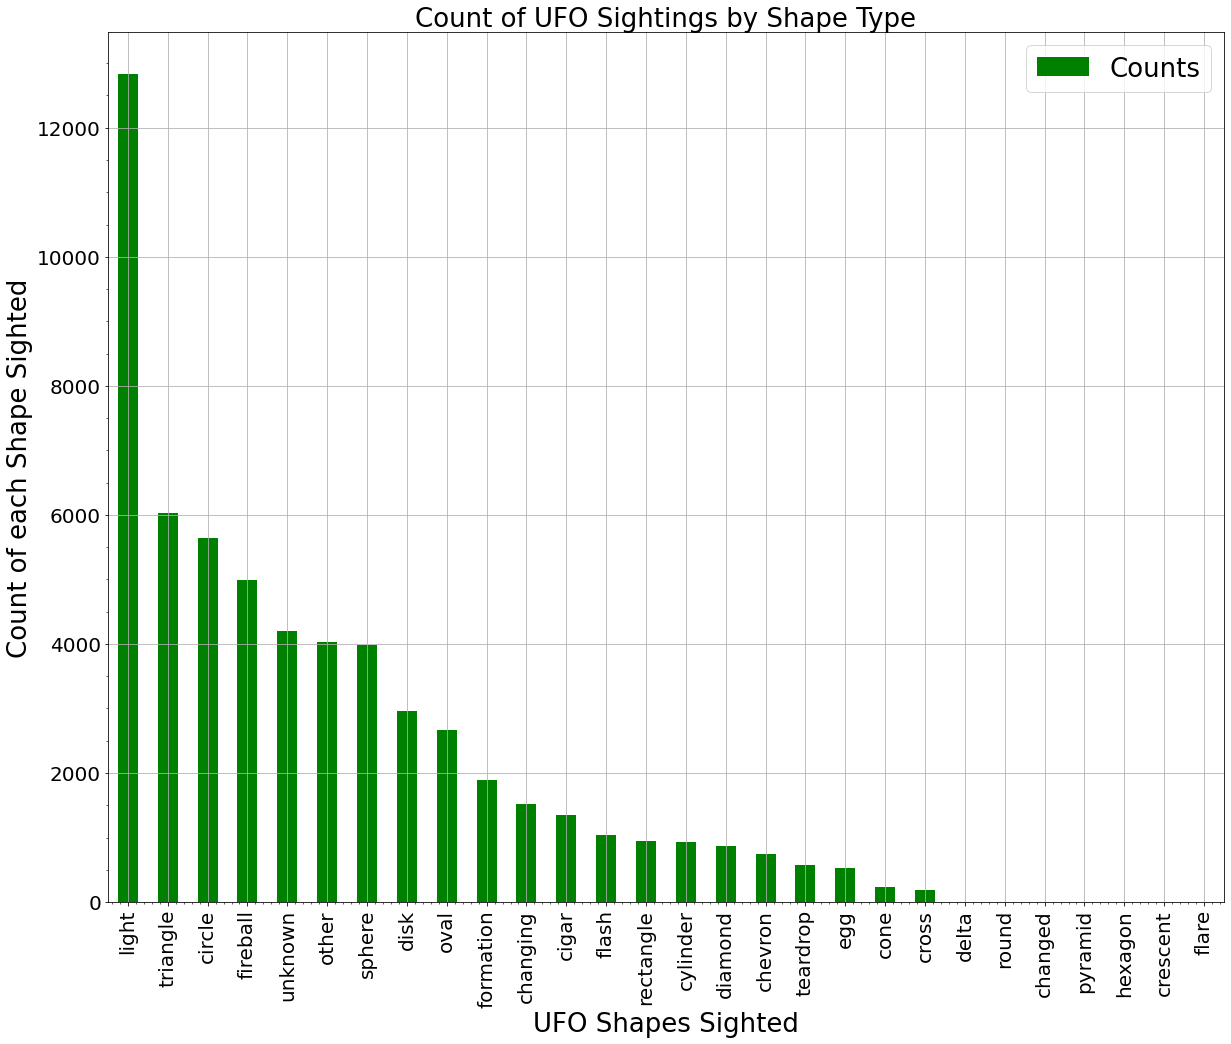

In [199]:
#create bar graph of total count of each UFO shape

shape_df.plot(kind='bar', color='g', figsize=(20,16), fontsize=20)

plt.xlabel("UFO Shapes Sighted", fontsize=26)
plt.ylabel("Count of each Shape Sighted", fontsize=26)
plt.title("Count of UFO Sightings by Shape Type", fontsize=26)

plt.minorticks_on()
plt.grid()
plt.legend(fontsize=26)
x_indexes = np.arange(len(shape_df))
plt.xticks(ticks=x_indexes, labels=shape_df["UFO Shape"])
#plt.savefig("Count of UFO Sigthings by Shape Type2.png")
plt.show()


In [3]:
#import csv file

cleaned_ufo_data = pd.read_csv("cleaned_ufo_data.csv")
cleaned_ufo_data.head(30)




,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
0,10/10/1993 22:00,peoria,il,us,light,8.0,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993
1,10/10/1993 23:00,carthage,tn,us,other,60.0,less than 1 min,1 object with green and red lights,3/21/2003,36.252222,-85.951667,10,10,23:00,1993
2,10/10/1994 18:30,burnt hills,ny,us,rectangle,120.0,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,10,10,18:30,1994
3,10/10/1994 22:00,pinebergen,ar,us,light,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994
4,10/10/1996 03:20,higginsville,mo,us,triangle,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,10,10,03:20,1996
5,10/10/1996 22:00,charleston,sc,us,light,300.0,5 min,Flashing object above Charleston&#44 SC,11/26/2003,32.776389,-79.931111,10,10,22:00,1996
6,10/10/1996 22:30,monroe county,oh,us,cylinder,60.0,1 minute,Looked like it went through the hillside,7/8/2004,39.440278,-84.362222,10,10,22:30,1996
7,10/10/1997 16:00,connersville,in,us,delta,14400.0,4 hours,3 differants types &#44 cluster &#44delta &#44...,1/28/1999,39.641111,-85.141111,10,10,16:00,1997
8,10/10/1997 17:00,mesa,az,us,sphere,30.0,30 seconds,A small dark purple quad-thruster craft hoveri...,2/14/2008,33.422222,-111.821944,10,10,17:00,1997
9,10/10/1997 20:00,bonaire,ga,us,triangle,300.0,<5 minutes,Triangular Object Sighted at Very Close Range,2/1/2007,32.543611,-83.596111,10,10,20:00,1997


In [4]:
#reduce dataframe to shape and year

smaller_data = cleaned_ufo_data[["shape", "Year"]]

smaller_data.head()

,shape,Year
0,light,1993
1,other,1993
2,rectangle,1994
3,light,1994
4,triangle,1996


In [5]:
#create a for loop to combine non-popluar shapes to Other shape type

other_list = ["flash", "rectangle", "cylinder", "diamond", "chevron", "teardrop", "egg", "cone", "cross", "delta", "round", "changed", "pyramid", "hexagon", "crescent", "flare"]

smaller_data['Shape_2'] = ""

for index, row in smaller_data.iterrows():
    shp = row["shape"]     
    if shp in other_list:
        smaller_data.loc[index, "Shape_2"] = "Other"
    else: 
        smaller_data.loc[index, "Shape_2"] = shp
        

C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [6]:
#view new columnun of shape_2 with reduced shape types

smaller_data.head()

,shape,Year,Shape_2
0,light,1993,light
1,other,1993,other
2,rectangle,1994,Other
3,light,1994,light
4,triangle,1996,triangle


In [7]:
#count of new shape types

shape2_df = smaller_data['Shape_2'].value_counts().rename_axis('UFO Shape').reset_index(name="Counts")

shape2_df

,UFO Shape,Counts
0,light,12837
1,Other,6040
2,triangle,6027
3,circle,5638
4,fireball,4996
5,unknown,4204
6,other,4027
7,sphere,3976
8,disk,2963
9,oval,2668


In [11]:
#Group by Shape, then year, and find a count 

year_group_df = smaller_data.groupby(['Shape_2', 'Year'])
year_group_df

count_year_df = year_group_df.count()
count_year_df



shape
Shape_2 Year       
Other   1993     29
        1994     34
        1995     41
        1996     59
        1997     91
...             ...
unknown 2010    267
        2011    304
        2012    403
        2013    373
        2014    141

[286 rows x 1 columns]

In [12]:
#unstack the data

unstack_data = count_year_df.unstack(level=0)
unstack_data

shape                                                                 \
Shape_2 Other changing cigar circle disk fireball formation light other oval   
Year                                                                           
1993       29        2    12     18   15        4         9    30    25    9   
1994       34        8     8     22   41       14         3    44    22   11   
1995       41        9    12     33   32       19         8    72    38   20   
1996       59       13     4     22   41       15        13    86    39   17   
1997       91       12    27     55   65       36        59   222   105   36   
1998      146       34    28    103   79      203        41   264   101   55   
1999      250       52    68    168  133      244        66   431   184   82   
2000      249       58    59    186  143      182        58   459   178   86   
2001      293       63    76    191  141      159        90   539   177  118   
2002      311       81    59    194  159      143        61   506   188  105   
2003      324       85    76    264  195      159        95   609   242  155   
2004      338       96    73    243  211      161       114   749   249  142   
2005      332      108    93    267  187      173        96   737   264  126   
2006      315       88    85    260  164      182        90   598   206  149   
2007      343       84   107    340  198      188       100   796   230  182   
2008      447      128   117    327  227      226       130   886   260  214   
2009      351       90    81    351  166      185       120   967   254  174   
2010      339       98    78    349  167      292        90   813   263  160   
2011      420       86    73    459  163      478       146   978   264  206   
2012      600      149    94    752  202      911       186  1312   319  300   
2013      547      128    91    796  167      846       238  1305   303  241   
2014      181       41    30    238   67      176        78   434   116   80   

                                 
Shape_2 sphere triangle unknown  
Year                             
1993        17       49       7  
1994        25       62      22  
1995        21       71      37  
1996        24       79      19  
1997        62      164      42  
1998       116      156      68  
1999       140      231     148  
2000       105      244     142  
2001       139      273     154  
2002       139      264     189  
2003       181      301     230  
2004       211      360     257  
2005       186      363     260  
2006       179      288     256  
2007       207      394     276  
2008       257      416     336  
2009       249      351     273  
2010       248      343     267  
2011       320      436     304  
2012       504      521     403  
2013       483      475     373  
2014       163      186     141

In [46]:
#rotate the unstacked data to change the columns to years and rows to shapes

unstack_data_rotate = unstack_data.T
unstack_data_rotate

Year             1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  \
      Shape_2                                                                 
shape Other        29    34    41    59    91   146   250   249   293   311   
      changing      2     8     9    13    12    34    52    58    63    81   
      cigar        12     8    12     4    27    28    68    59    76    59   
      circle       18    22    33    22    55   103   168   186   191   194   
      disk         15    41    32    41    65    79   133   143   141   159   
      fireball      4    14    19    15    36   203   244   182   159   143   
      formation     9     3     8    13    59    41    66    58    90    61   
      light        30    44    72    86   222   264   431   459   539   506   
      other        25    22    38    39   105   101   184   178   177   188   
      oval          9    11    20    17    36    55    82    86   118   105   
      sphere       17    25    21    24    62   116   140   105   139   139   
      triangle     49    62    71    79   164   156   231   244   273   264   
      unknown       7    22    37    19    42    68   148   142   154   189   

Year             ...  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
      Shape_2    ...                                                         
shape Other      ...   332   315   343   447   351   339   420   600   547   
      changing   ...   108    88    84   128    90    98    86   149   128   
      cigar      ...    93    85   107   117    81    78    73    94    91   
      circle     ...   267   260   340   327   351   349   459   752   796   
      disk       ...   187   164   198   227   166   167   163   202   167   
      fireball   ...   173   182   188   226   185   292   478   911   846   
      formation  ...    96    90   100   130   120    90   146   186   238   
      light      ...   737   598   796   886   967   813   978  1312  1305   
      other      ...   264   206   230   260   254   263   264   319   303   
      oval       ...   126   149   182   214   174   160   206   300   241   
      sphere     ...   186   179   207   257   249   248   320   504   483   
      triangle   ...   363   288   394   416   351   343   436   521   475   
      unknown    ...   260   256   276   336   273   267   304   403   373   

Year             2014  
      Shape_2          
shape Other       181  
      changing     41  
      cigar        30  
      circle      238  
      disk         67  
      fireball    176  
      formation    78  
      light       434  
      other       116  
      oval         80  
      sphere      163  
      triangle    186  
      unknown     141  

[13 rows x 22 columns]

In [49]:
#find percentage of columns (Year)

percent_data = unstack_data_rotate/unstack_data_rotate.sum()*100
percent_data

Year                  1993       1994       1995       1996       1997  \
      Shape_2                                                            
shape Other      12.831858  10.759494   9.927361  13.689095   9.323770   
      changing    0.884956   2.531646   2.179177   3.016241   1.229508   
      cigar       5.309735   2.531646   2.905569   0.928074   2.766393   
      circle      7.964602   6.962025   7.990315   5.104408   5.635246   
      disk        6.637168  12.974684   7.748184   9.512761   6.659836   
      fireball    1.769912   4.430380   4.600484   3.480278   3.688525   
      formation   3.982301   0.949367   1.937046   3.016241   6.045082   
      light      13.274336  13.924051  17.433414  19.953596  22.745902   
      other      11.061947   6.962025   9.200969   9.048724  10.758197   
      oval        3.982301   3.481013   4.842615   3.944316   3.688525   
      sphere      7.522124   7.911392   5.084746   5.568445   6.352459   
      triangle   21.681416  19.620253  17.191283  18.329466  16.803279   
      unknown     3.097345   6.962025   8.958838   4.408353   4.303279   

Year                  1998       1999       2000       2001       2002  ...  \
      Shape_2                                                           ...   
shape Other      10.473458  11.379153  11.586785  12.142561  12.963735  ...   
      changing    2.439024   2.366864   2.698930   2.610858   3.376407  ...   
      cigar       2.008608   3.095130   2.745463   3.149606   2.459358  ...   
      circle      7.388809   7.646791   8.655188   7.915458   8.086703  ...   
      disk        5.667145   6.053710   6.654258   5.843349   6.627762  ...   
      fireball   14.562410  11.106054   8.469055   6.589308   5.960817  ...   
      formation   2.941176   3.004096   2.698930   3.729797   2.542726  ...   
      light      18.938307  19.617660  21.358772  22.337339  21.092122  ...   
      other       7.245337   8.375057   8.282922   7.335267   7.836599  ...   
      oval        3.945481   3.732362   4.001861   4.890178   4.376824  ...   
      sphere      8.321377   6.372326   4.885993   5.760464   5.794081  ...   
      triangle   11.190818  10.514338  11.354118  11.313717  11.004585  ...   
      unknown     4.878049   6.736459   6.607725   6.382097   7.878283  ...   

Year                  2005       2006       2007       2008       2009  \
      Shape_2                                                            
shape Other      10.401003  11.013986   9.956459  11.256610   9.717608   
      changing    3.383459   3.076923   2.438316   3.223369   2.491694   
      cigar       2.913534   2.972028   3.105951   2.946361   2.242525   
      circle      8.364662   9.090909   9.869376   8.234702   9.717608   
      disk        5.858396   5.734266   5.747460   5.716444   4.595792   
      fireball    5.419799   6.363636   5.457184   5.691262   5.121816   
      formation   3.007519   3.146853   2.902758   3.273735   3.322259   
      light      23.088972  20.909091  23.105951  22.311760  26.771872   
      other       8.270677   7.202797   6.676343   6.547469   7.032115   
      oval        3.947368   5.209790   5.283019   5.389071   4.817276   
      sphere      5.827068   6.258741   6.008708   6.471921   6.893688   
      triangle   11.372180  10.069930  11.436865  10.475951   9.717608   
      unknown     8.145363   8.951049   8.011611   8.461345   7.558140   

Year                  2010       2011       2012       2013       2014  
      Shape_2                                                           
shape Other       9.666382   9.693053   9.595394   9.127315   9.373382  
      changing    2.794411   1.984768   2.382856   2.135825   2.123252  
      cigar       2.224123   1.684745   1.503278   1.518438   1.553599  
      circle      9.951526  10.593123  12.026227  13.282163  12.325220  
      disk        4.761905   3.761828   3.230449   2.786584   3.469705  
      fireball    8.326205  11.031618  14.569007  14.116469   9.114448  
      fo

In [31]:
#Add Sum column to unrotated data to verify percentage are correct

unstack_data['sum'] = unstack_data[unstack_data.columns].sum(axis=1)
unstack_data

shape                                                                 \
Shape_2 Other changing cigar circle disk fireball formation light other oval   
Year                                                                           
1993       29        2    12     18   15        4         9    30    25    9   
1994       34        8     8     22   41       14         3    44    22   11   
1995       41        9    12     33   32       19         8    72    38   20   
1996       59       13     4     22   41       15        13    86    39   17   
1997       91       12    27     55   65       36        59   222   105   36   
1998      146       34    28    103   79      203        41   264   101   55   
1999      250       52    68    168  133      244        66   431   184   82   
2000      249       58    59    186  143      182        58   459   178   86   
2001      293       63    76    191  141      159        90   539   177  118   
2002      311       81    59    194  159      143        61   506   188  105   
2003      324       85    76    264  195      159        95   609   242  155   
2004      338       96    73    243  211      161       114   749   249  142   
2005      332      108    93    267  187      173        96   737   264  126   
2006      315       88    85    260  164      182        90   598   206  149   
2007      343       84   107    340  198      188       100   796   230  182   
2008      447      128   117    327  227      226       130   886   260  214   
2009      351       90    81    351  166      185       120   967   254  174   
2010      339       98    78    349  167      292        90   813   263  160   
2011      420       86    73    459  163      478       146   978   264  206   
2012      600      149    94    752  202      911       186  1312   319  300   
2013      547      128    91    796  167      846       238  1305   303  241   
2014      181       41    30    238   67      176        78   434   116   80   

                                  sum  
Shape_2 sphere triangle unknown        
Year                                   
1993        17       49       7   226  
1994        25       62      22   316  
1995        21       71      37   413  
1996        24       79      19   431  
1997        62      164      42   976  
1998       116      156      68  1394  
1999       140      231     148  2197  
2000       105      244     142  2149  
2001       139      273     154  2413  
2002       139      264     189  2399  
2003       181      301     230  2916  
2004       211      360     257  3204  
2005       186      363     260  3192  
2006       179      288     256  2860  
2007       207      394     276  3445  
2008       257      416     336  3971  
2009       249      351     273  3612  
2010       248      343     267  3507  
2011       320      436     304  4333  
2012       504      521     403  6253  
2013       483      475     373  5993  
2014       163      186     141  1931

In [51]:
#rotate the percentage data back to shape being the columns and years the rows
unstack_data_unrotate = percent_data.T
unstack_data_unrotate

shape                                                       \
Shape_2      Other  changing     cigar     circle       disk   fireball   
Year                                                                      
1993     12.831858  0.884956  5.309735   7.964602   6.637168   1.769912   
1994     10.759494  2.531646  2.531646   6.962025  12.974684   4.430380   
1995      9.927361  2.179177  2.905569   7.990315   7.748184   4.600484   
1996     13.689095  3.016241  0.928074   5.104408   9.512761   3.480278   
1997      9.323770  1.229508  2.766393   5.635246   6.659836   3.688525   
1998     10.473458  2.439024  2.008608   7.388809   5.667145  14.562410   
1999     11.379153  2.366864  3.095130   7.646791   6.053710  11.106054   
2000     11.586785  2.698930  2.745463   8.655188   6.654258   8.469055   
2001     12.142561  2.610858  3.149606   7.915458   5.843349   6.589308   
2002     12.963735  3.376407  2.459358   8.086703   6.627762   5.960817   
2003     11.111111  2.914952  2.606310   9.053498   6.687243   5.452675   
2004     10.549313  2.996255  2.278402   7.584270   6.585518   5.024969   
2005     10.401003  3.383459  2.913534   8.364662   5.858396   5.419799   
2006     11.013986  3.076923  2.972028   9.090909   5.734266   6.363636   
2007      9.956459  2.438316  3.105951   9.869376   5.747460   5.457184   
2008     11.256610  3.223369  2.946361   8.234702   5.716444   5.691262   
2009      9.717608  2.491694  2.242525   9.717608   4.595792   5.121816   
2010      9.666382  2.794411  2.224123   9.951526   4.761905   8.326205   
2011      9.693053  1.984768  1.684745  10.593123   3.761828  11.031618   
2012      9.595394  2.382856  1.503278  12.026227   3.230449  14.569007   
2013      9.127315  2.135825  1.518438  13.282163   2.786584  14.116469   
2014      9.373382  2.123252  1.553599  12.325220   3.469705   9.114448   

                                                                        \
Shape_2 formation      light      other      oval    sphere   triangle   
Year                                                                     
1993     3.982301  13.274336  11.061947  3.982301  7.522124  21.681416   
1994     0.949367  13.924051   6.962025  3.481013  7.911392  19.620253   
1995     1.937046  17.433414   9.200969  4.842615  5.084746  17.191283   
1996     3.016241  19.953596   9.048724  3.944316  5.568445  18.329466   
1997     6.045082  22.745902  10.758197  3.688525  6.352459  16.803279   
1998     2.941176  18.938307   7.245337  3.945481  8.321377  11.190818   
1999     3.004096  19.617660   8.375057  3.732362  6.372326  10.514338   
2000     2.698930  21.358772   8.282922  4.001861  4.885993  11.354118   
2001     3.729797  22.337339   7.335267  4.890178  5.760464  11.313717   
2002     2.542726  21.092122   7.836599  4.376824  5.794081  11.004585   
2003     3.257888  20.884774   8.299040  5.315501  6.207133  10.322359   
2004     3.558052  23.377029   7.771536  4.431960  6.585518  11.235955   
2005     3.007519  23.088972   8.270677  3.947368  5.827068  11.372180   
2006     3.146853  20.909091   7.202797  5.209790  6.258741  10.069930   
2007     2.902758  23.105951   6.676343  5.283019  6.008708  11.436865   
2008     3.273735  22.311760   6.547469  5.389071  6.471921  10.475951   
2009     3.322259  26.771872   7.032115  4.817276  6.893688   9.717608   
2010     2.566296  23.182207   7.499287  4.562304  7.071571   9.780439   
2011     3.369490  22.570967   6.092776  4.754212  7.385183  10.062312   
2012     2.974572  20.981929   5.101551  4.797697  8.060131   8.332001   
2013     3.971300  21.775405   5.055899  4.021358  8.059403   7.925914   
2014     4.039358  22.475401   6.007250  4.142931  8.441222   9.632315   

                   
Shape_2   unknown  
Year               
1993     3.097345  
1994     6.962025  
1995     8.958838  
1996     4.408353  
1997     4.303279  
1998     4.878049  
1999     6.736459  
2000     6.607725  
2001     6.382097  
2002     7.878283  
2003     7.887517  
2004  

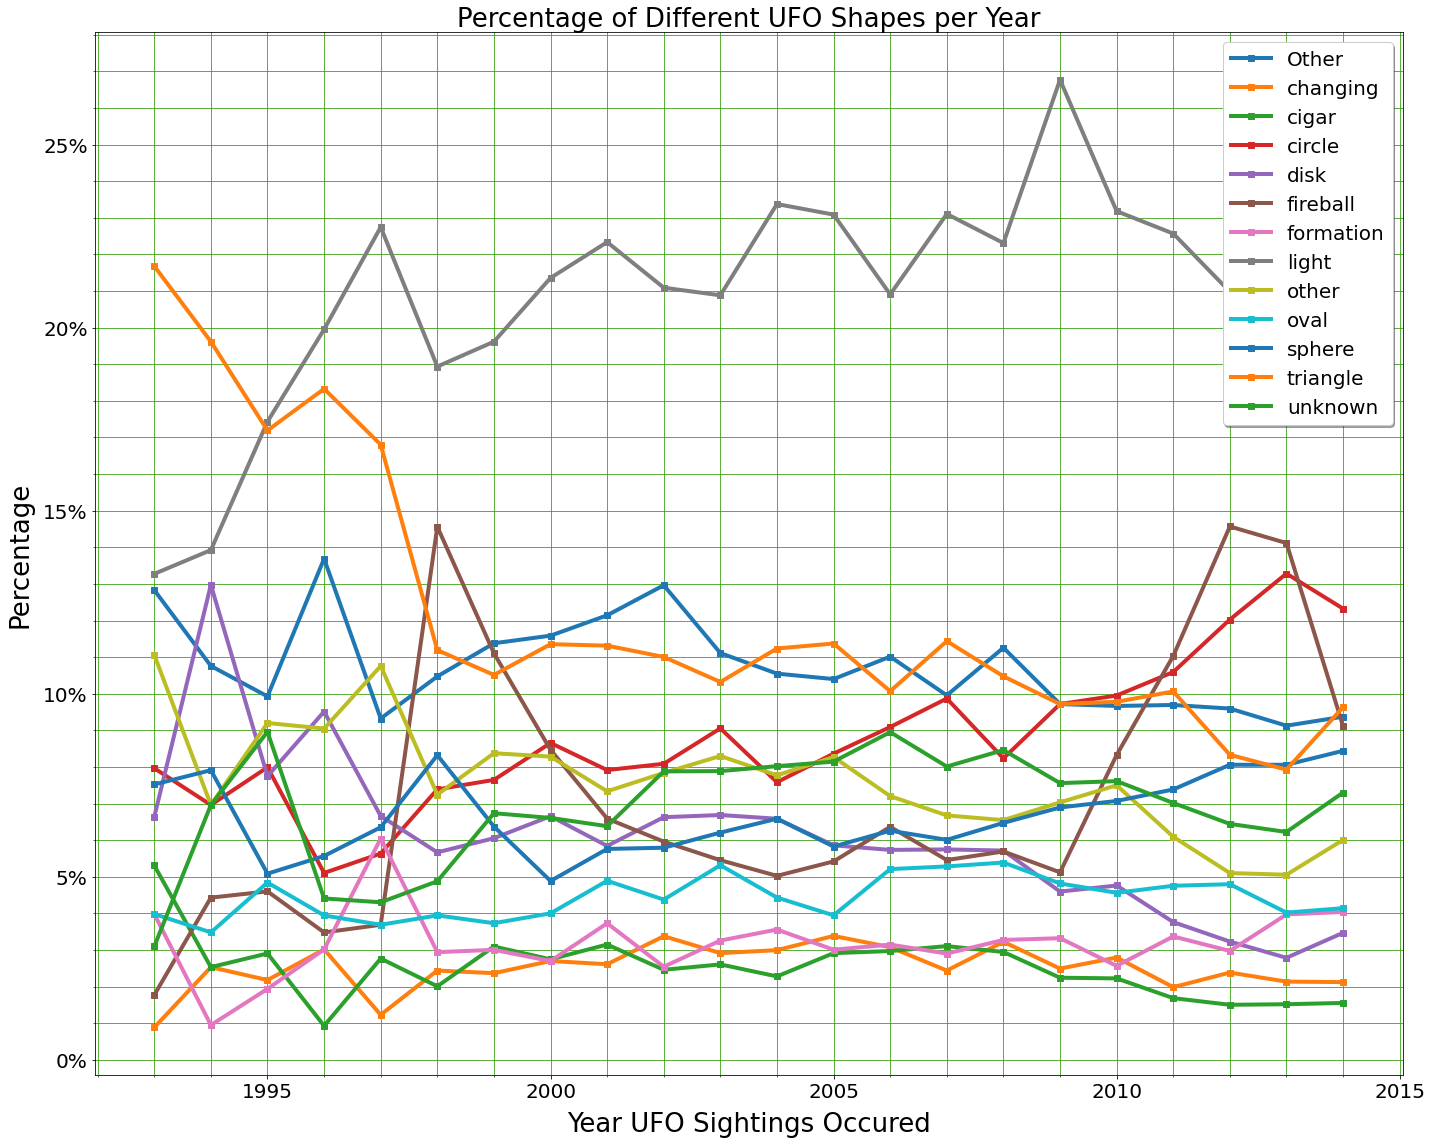

In [186]:
#plot the percentage data for year

unstack_data_unrotate.plot(kind='line', marker="s", linewidth=4, figsize=(20,16), fontsize=20)

plt.xlabel("Year UFO Sightings Occured", fontsize=26, labelpad = 10)
plt.ylabel("Percentage", fontsize=26, labelpad = 10)
plt.title("Percentage of Different UFO Shapes per Year", fontsize=26)

plt.minorticks_on()
plt.grid(b=True, which='major', color='#369c0b', linestyle='-')
plt.grid(b=True, which='minor', color='#369c0b', linestyle='-')
plt.legend(["Other", "changing", "cigar", "circle", "disk", "fireball", "formation", "light", "other", "oval", "sphere", "triangle", "unknown"], loc="upper right", shadow=True, numpoints=True, fontsize=20)

ylabels = ["0%", '5%','10%', '15%', '20%', '25%']
plt.yticks(np.arange(0,26,5), ylabels)

plt.tight_layout()


#plt.savefig("Percentage of Different Shapes per Year without grid.png")


plt.show()


In [102]:
#import csv file with region added

region_ufo_data = pd.read_csv("alien_region.csv")
region_ufo_data.head(30)


C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year,region
0,0,10/10/1993 22:00,peoria,il,us,light,8,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993,Midwest
1,1,10/10/1998 13:15,elgin,il,us,cylinder,1800,30 +/- min,While looking up at sky I noticed a bright lig...,11/1/1998,42.037222,-88.281111,10,10,13:15,1998,Midwest
2,2,10/10/2004 15:00,rock island,il,us,sphere,3600,1 hour,The sky was clear and the objects at times ap...,10/27/2004,41.509444,-90.578611,10,10,15:00,2004,Midwest
3,3,10/10/2010 20:45,sterling,il,us,cylinder,600,10min,It had rows of white lights with red lights pu...,11/21/2010,41.788611,-89.696111,10,10,20:45,2010,Midwest
4,4,10/10/2012 20:30,marion,il,us,light,240,2 to 4 minutes,I was leaving my friend&#39s house to go home....,10/30/2012,37.730556,-88.933056,10,10,20:30,2012,Midwest
5,5,10/11/1999 22:30,addison (i-355 and us 20 (lake st.),il,us,disk,600,10 min,Saucer shaped object&#44with rows of red light...,11/9/1999,41.931667,-87.988889,10,11,22:30,1999,Midwest
6,6,10/11/2011 03:15,omaha,il,us,chevron,120,2 min,I noticed the craft as it had just passed over...,10/19/2011,37.890278,-88.303056,10,11,03:15,2011,Midwest
7,7,10/11/2012 22:15,blue island,il,us,circle,45,45 seconds,Red circular object surrounded by yellow glow ...,10/30/2012,41.657222,-87.680000,10,11,22:15,2012,Midwest
8,8,10/11/2013 22:10,lombard,il,us,formation,60,1 minute,5-8 orange lights over suburban Chicago,10/14/2013,41.880000,-88.007778,10,11,22:10,2013,Midwest
9,9,10/1/1995 22:00,tinley park,il,us,other,20,20 seconds,Sheild shaped craft spotted at outdoor concert...,3/11/2003,41.573333,-87.784444,10,1,22:00,1995,Midwest


In [138]:
#reduce dataframe to shape and region

smaller_region_data = region_ufo_data[["shape", "region"]]

smaller_region_data.head()

,shape,region
0,light,Midwest
1,cylinder,Midwest
2,sphere,Midwest
3,cylinder,Midwest
4,light,Midwest


In [140]:
#create a for loop to combine non-popluar shapes to Other shape type

other_list = ["flash", "rectangle", "cylinder", "diamond", "chevron", "teardrop", "egg", "cone", "cross", "delta", "round", "changed", "pyramid", "hexagon", "crescent", "flare"]

smaller_region_data['Shape_2'] = ""

for index, row in smaller_region_data.iterrows():
    shp = row["shape"]     
    if shp in other_list:
        smaller_region_data.loc[index, "Shape_2"] = "Other"
    else: 
        smaller_region_data.loc[index, "Shape_2"] = shp
        

C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [141]:
#verify new shape type is added

smaller_region_data.head()

,shape,region,Shape_2
0,light,Midwest,light
1,cylinder,Midwest,Other
2,sphere,Midwest,sphere
3,cylinder,Midwest,Other
4,light,Midwest,light


In [142]:
#group by region than shape, and then find the count

region_groupby_df = smaller_region_data.groupby(['region', 'Shape_2'])
region_groupby_df

region_count_year = region_groupby_df.count()
region_count_year


shape
region     Shape_2         
Midwest    Other       1181
           changing     259
           cigar        279
           circle      1139
           disk         569
           fireball    1151
           formation    418
           light       2692
           other        779
           oval         503
           sphere       810
           triangle    1446
           unknown      860
North-East Other        940
           changing     192
           cigar        222
           circle       945
           disk         500
           fireball     800
           formation    270
           light       1921
           other        629
           oval         476
           sphere       567
           triangle     870
           unknown      640
South      Other       1802
           changing     477
           cigar        457
           circle      1669
           disk         830
           fireball    1360
           formation    509
           light       3571
           other       1183
           oval         777
           sphere      1153
           triangle    1793
           unknown     1316
West       Other       2212
           changing     602
           cigar        411
           circle      1936
           disk        1101
           fireball    1722
           formation    716
           light       4806
           other       1495
           oval         958
           sphere      1497
           triangle    2008
           unknown     1427

In [155]:
#unstack the data

unstack_region_data = region_count_year.unstack(level=0)
unstack_region_data

shape                       
region    Midwest North-East South  West
Shape_2                                 
Other        1181        940  1802  2212
changing      259        192   477   602
cigar         279        222   457   411
circle       1139        945  1669  1936
disk          569        500   830  1101
fireball     1151        800  1360  1722
formation     418        270   509   716
light        2692       1921  3571  4806
other         779        629  1183  1495
oval          503        476   777   958
sphere        810        567  1153  1497
triangle     1446        870  1793  2008
unknown       860        640  1316  1427

In [144]:
#find percentage of columns (region)

percent_region_data = unstack_region_data/unstack_region_data.sum()*100
percent_region_data

shape                                 
region       Midwest North-East      South       West
Shape_2                                              
Other       9.771637  10.477040  10.664615  10.588292
changing    2.142975   2.139991   2.822986   2.881624
cigar       2.308456   2.474365   2.704622   1.967354
circle      9.424127  10.532769   9.877493   9.267149
disk        4.707927   5.572893   4.912115   5.270212
fireball    9.523416   8.916630   8.048766   8.242784
formation   3.458547   3.009362   3.012369   3.427313
light      22.273705  21.411057  21.133929  23.005122
other       6.445474   7.010700   7.001243   7.156192
oval        4.161840   5.305395   4.598449   4.585707
sphere      6.701969   6.319661   6.823697   7.165765
triangle   11.964256   9.696835  10.611351   9.611795
unknown     7.115671   7.133304   7.788365   6.830693

In [168]:
#rotate the percentage data to shape being the columns and region the rows
unstack_region_data_rotate = percent_region_data.T
unstack_region_data_rotate



Shape_2               Other  changing     cigar     circle      disk  \
      region                                                           
shape Midwest      9.771637  2.142975  2.308456   9.424127  4.707927   
      North-East  10.477040  2.139991  2.474365  10.532769  5.572893   
      South       10.664615  2.822986  2.704622   9.877493  4.912115   
      West        10.588292  2.881624  1.967354   9.267149  5.270212   

Shape_2           fireball  formation      light     other      oval  \
      region                                                           
shape Midwest     9.523416   3.458547  22.273705  6.445474  4.161840   
      North-East  8.916630   3.009362  21.411057  7.010700  5.305395   
      South       8.048766   3.012369  21.133929  7.001243  4.598449   
      West        8.242784   3.427313  23.005122  7.156192  4.585707   

Shape_2             sphere   triangle   unknown  
      region                                     
shape Midwest     6.701969  11.964256  7.115671  
      North-East  6.319661   9.696835  7.133304  
      South       6.823697  10.611351  7.788365  
      West        7.165765   9.611795  6.830693

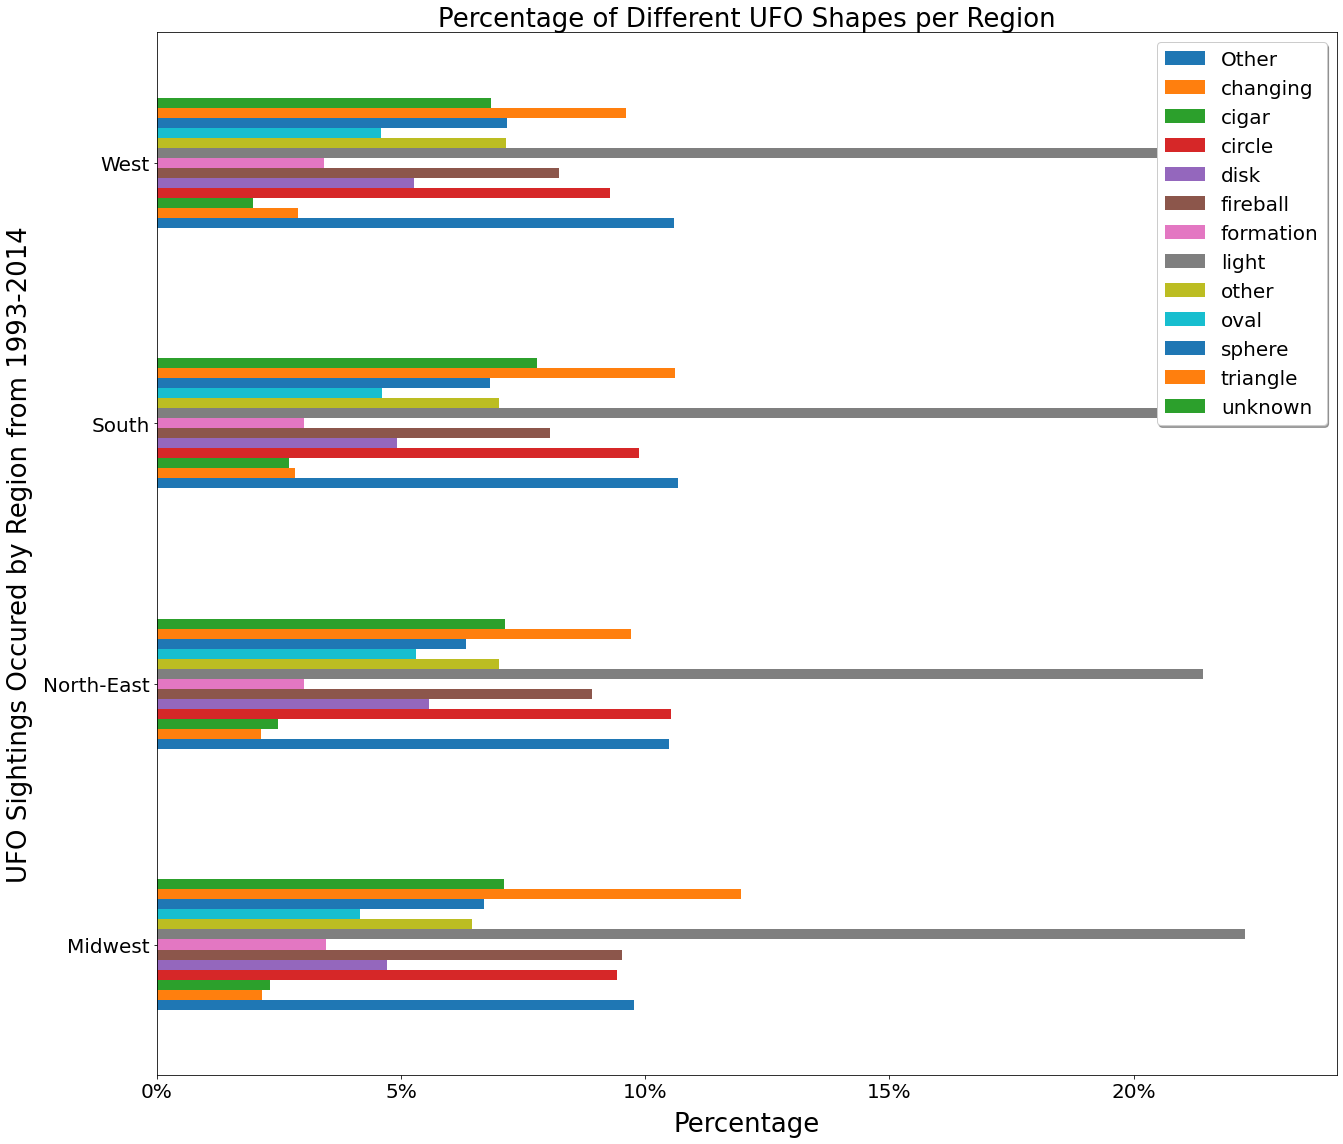

In [187]:
#plot the percentage of shapes by region data

unstack_region_data_rotate.plot(kind='barh', figsize=(20,16), fontsize=20)

plt.xlabel("Percentage", fontsize=26, labelpad = 10)
plt.ylabel("UFO Sightings Occured by Region from 1993-2014", fontsize=26, labelpad = 10)
plt.title("Percentage of Different UFO Shapes per Region", fontsize=26)


#plt.grid(b=True, which='major', color='#369c0b', linestyle='-')
#plt.grid(b=True, which='minor', color='#369c0b', linestyle='-')
plt.legend(["Other", "changing", "cigar", "circle", "disk", "fireball", "formation", "light", "other", "oval", "sphere", "triangle", "unknown"], loc="upper right", shadow=True, numpoints=True, fontsize=20)

plt.tight_layout()

plt.yticks(np.arange(4), labels)
labels = ["Midwest", "North-East", "South", "West"]
xlabels = ["0%", '5%','10%', '15%', '20%']
plt.xticks(np.arange(0,25,5), xlabels)


plt.savefig("Percentage of Different Shapes by Region.png")


plt.show()